<a href="https://colab.research.google.com/github/wonkwonlee/a2w-kma-big-data-contest/blob/main/ASOS_CSV_Backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASOS_CSV.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필수 사용 라이브러리
from urllib.parse import urlencode, quote_plus # 크롤링 요청을 위한 라이브러리
import pandas as pd # 데이터 프레임화를 위한 라이브러리
import requests # 크롤링한 데이터를 결과물로 가져오기 위한 라이브러리
import json # json 파일 관리를 위한 라이브러리

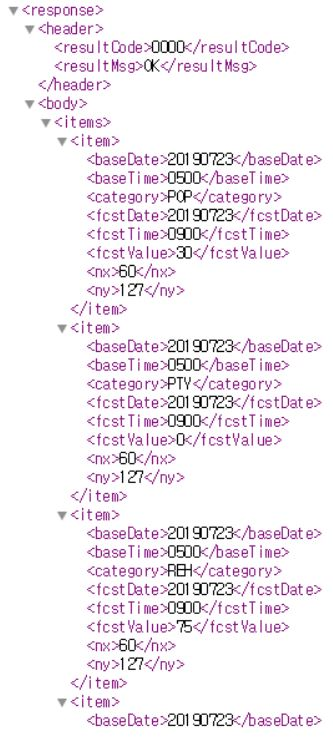

In [ ]:
# 기상청에서 ASOS 일 자료 데이터 크롤링 

# 데이터 추출 목록 : 년도
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'

# 데이터 추출 목록 : 1년의 날짜 수, 페이지에 넣어주기 위한 데이터
pages = ['365', '366', '365', '365', '365', '366', '365', '365', '365']

# 데이터 추출 목록 : 경상남도, 경상북도 데이터 추출 지점 목록
sites = ['115', '130', '136', '137', '138', '143', '152', '155', '159', '253', '255', '257', '263', '264', '271', '272', '273', '162', '192', '276', '277', '278', '279', '281', '283', '284', '285', '288', '289', '294', '295']

# 데이터 추출 목록 : 경상남도, 경상북도 데이터 추출 지점 목록의 csv 제목 파일을 위한 인덱스
sites_index = ['울릉도', '울진', '안동', '상주', '포항', '대구', '울산', '창원', '부산', '김해시', '북창원', '양산시', '의령군', '함양군', '봉화', '영주', '문경', '통영', '진주', '청송군', '영덕', '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해']

# 실제 크롤링 과정
url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList' # 크롤링용 페이지 주소 링크 삽입
queryParams = '?' + urlencode({
    quote_plus('ServiceKey') : 'CAIBVqzvwcT56GH1ji8TrqWaQ6UTQ5NQFbigaXcQSMBZzMwerbOq437GPuVl0vfoc7+7F6MaoS2B0WOxZp2HXg==', # Decoder 인증키 삽입
    quote_plus('pageNo') : '1', # 한 페이지 결과 수
    quote_plus('numOfRows') : '365', # 페이지 번호, MAX = 999
    quote_plus('dataType') : 'JSON', # 응답 자료 형식 XML or JSON
    quote_plus('dataCd') : 'ASOS', # 자료 분류 코드
    quote_plus('dateCd') : 'DAY', # 날짜 분류 코드
    quote_plus('startDt') : '20110101', # 조회 기간 시작일
    quote_plus('endDt') : '20191231', # 조회 기간 종료일
    quote_plus('stnIds') : '138' # 종관 기상 관측 지점 번호
})

# 파일 데이터 프레임화
result = requests.get(url + queryParams)
js = json.loads(result.content)
data = pd.DataFrame(js['response']['body']['items']['item']) # 데이터프레임 인덱스

# 본인 드라이브에 csv파일 저장하기
data.to_csv("/content/drive/MyDrive/Meteorological_Agency_Bigdata_Contest/ASOS_DAY_weather.csv", index=False, encoding='utf-8-sig')